---
## Dependencias

In [53]:
import pandas as pd
import ast
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from math import sqrt

## Cargamos los datos

In [3]:
# Cargar los datos preprocesados
df_libro = pd.read_csv("../data/output/libro_cev_preprocesado.csv", sep="|", encoding="utf-8")
df_testimonios = pd.read_csv("../data/output/testimonios_cev_preprocesado.csv", sep="|", encoding="utf-8")

In [4]:
df_libro.head(2)

,seccion,seccion_principal,subseccion,contenido,contenido_preprocesado
0,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,"La guerra, el territorio y las mujeres",Las mujeres viven la guerra en sus territorios...,"[['mujer', 'vivir', 'guerra', 'territorio', 'v..."
1,Mujeres,¿Qué pasó? Significados y magnitudes de lo su...,Las violencias sexuales y reproductivas contra...,Duele la lengua rota. \n¿Dónde está mi femenin...,"[['doler', 'lengua', 'roto'], ['femenino'], ['..."


In [5]:
df_testimonios.head(2)

,id_doc,pages,text,text_clean,contenido_preprocesado
0,5eb4e7bfda6da3b502da3589.pdf,30,001-VI-00008\nTEST: Bajo la apariencia de una...,"bajo la apariencia de una democracia formal , ...","[['apariencia', 'democracia', 'formal', 'colom..."
1,5eb4e7c1da6da3b502da3593.pdf,15,"ENT:\nBueno, hoy es --------------------------...","bueno , hoy es y vamos a empezar la entrevista...","[['empezar', 'entrevista'], ['pedir', 'test', ..."


## Frecuencia de los terminos

In [6]:
tokens_doc = []
for fila in df_libro['contenido_preprocesado']:
    try:
        listas = ast.literal_eval(fila)
        # Aplanar cada sublista
        for sub in listas:
            for tok in sub:
                if len(tok) >= 1:
                    tokens_doc.append(tok)
    except (ValueError, SyntaxError):
        # Si alguna fila no se puede convertir, la ignoramos o podrías loguearla
        continue

In [7]:
tokens_doc[:10]

['mujer',
 'vivir',
 'guerra',
 'territorio',
 'vida',
 'cuerpo',
 'cualquiera',
 'persona',
 'afectar',
 'conflicto']

In [8]:
fdist = FreqDist(tokens_doc)
frecuencias = sorted(fdist.items(), key=lambda kv: (-kv[1], kv[0]))

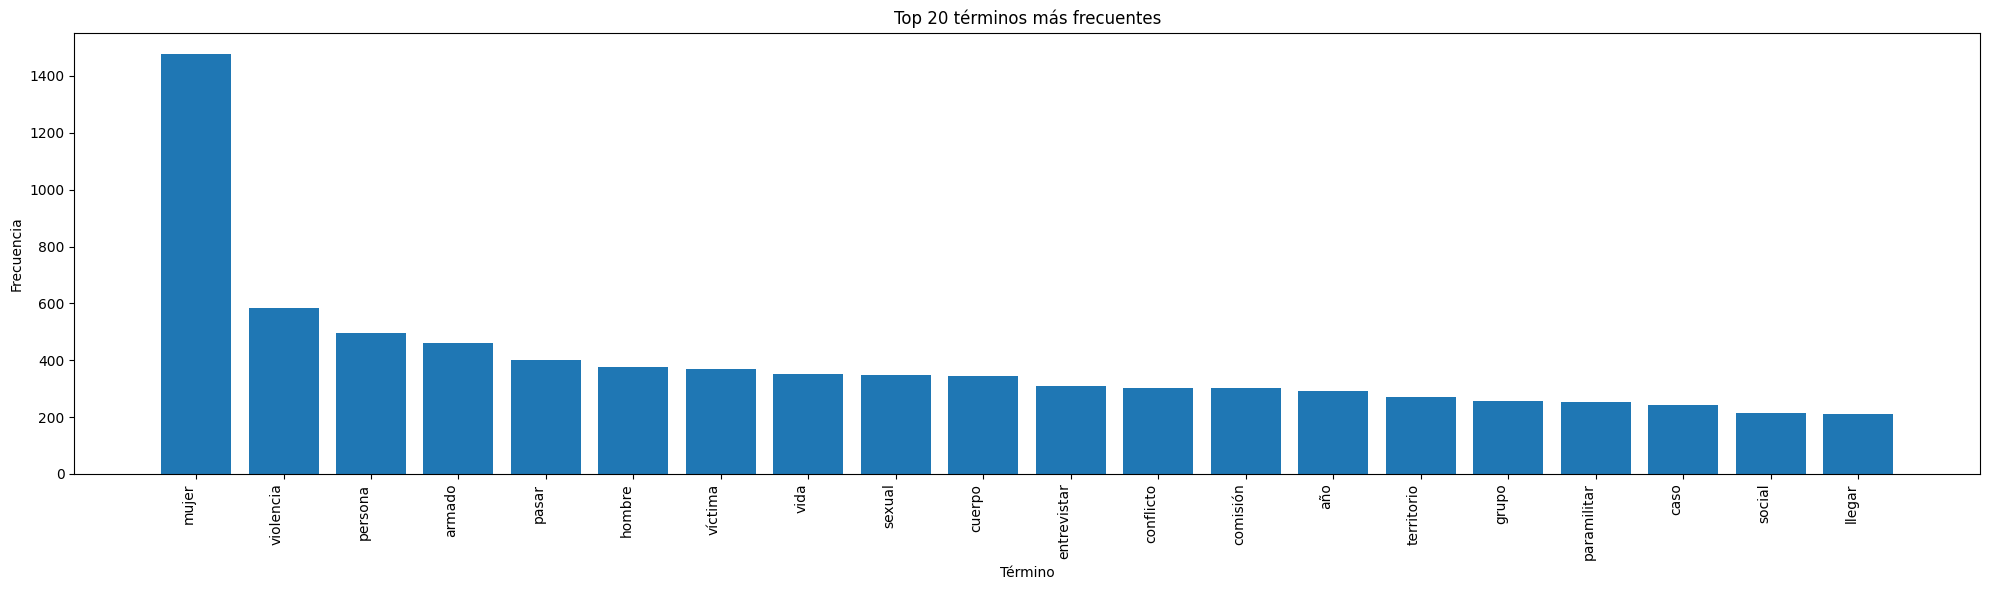

In [9]:
palabras, counts = zip(*frecuencias[:20])  # Top 20 términos más frecuentes

plt.figure(figsize=(20, 6))
plt.bar(range(len(palabras)), counts)
plt.xticks(range(len(palabras)), palabras, rotation=90, ha='right')
plt.xlabel("Término")
plt.ylabel("Frecuencia")
plt.title(f"Top {20} términos más frecuentes")
plt.tight_layout()
plt.show()

In [16]:
def frecuencia_terminos_columna_str(df: pd.DataFrame, col: str, min_len: int = 1):
    """
    Devuelve una lista de (término, frecuencia) a partir de una columna
    que contiene strings con formato de lista de listas.
    """
    tokens_doc = []
    for fila in df[col]:
        try:
            listas = ast.literal_eval(fila)
            for sub in listas:
                for tok in sub:
                    if len(tok) >= min_len:
                        tokens_doc.append(tok)
        except (ValueError, SyntaxError):
            continue
    fdist = FreqDist(tokens_doc)
    # Convertir a lista ordenada de tuplas (término, frecuencia)
    return sorted(fdist.items(), key=lambda kv: (-kv[1], kv[0]))

def graficar_frecuencias(df: pd.DataFrame, col: str, top_n: int = 20, min_len: int = 1):
    """
    Grafica las top_n palabras más frecuentes de la columna indicada.
    """
    frecuencias = frecuencia_terminos_columna_str(df, col, min_len)
    if not frecuencias:
        print("No hay datos para graficar.")
        return

    # Ahora sí se puede hacer slicing
    palabras, counts = zip(*frecuencias[:top_n])
    print(palabras)
    print(counts)

    plt.figure(figsize=(20, 6))
    plt.bar(range(len(palabras)), counts)
    plt.xticks(range(len(palabras)), palabras, rotation=90, ha='right')
    plt.xlabel("Término")
    plt.ylabel("Frecuencia")
    plt.title(f"Top {top_n} términos más frecuentes")
    plt.tight_layout()
    plt.show()


('mujer', 'violencia', 'persona', 'armado', 'pasar', 'hombre', 'víctima', 'vida', 'sexual', 'cuerpo', 'entrevistar', 'conflicto', 'comisión', 'año', 'territorio', 'grupo', 'paramilitar', 'caso', 'social', 'llegar', 'guerra', 'querer', 'político', 'vivir', 'paz', 'familia', 'forma', 'dejar', 'guerrilla', 'público', 'fuerza', 'género', 'derecho', 'gay', 'casa', 'informe', 'organización', 'amenaza', 'hijo', 'colombia', 'salir', 'comunidad', 'nacional', 'forzado', 'lugar', 'actor', 'tierra', 'proceso', 'pueblo', 'allá')
(1478, 584, 497, 462, 402, 376, 368, 351, 348, 344, 309, 302, 301, 292, 270, 255, 254, 244, 213, 209, 186, 183, 180, 179, 174, 173, 167, 161, 161, 160, 157, 157, 156, 153, 152, 152, 152, 150, 149, 148, 143, 141, 139, 137, 133, 132, 131, 129, 129, 127)


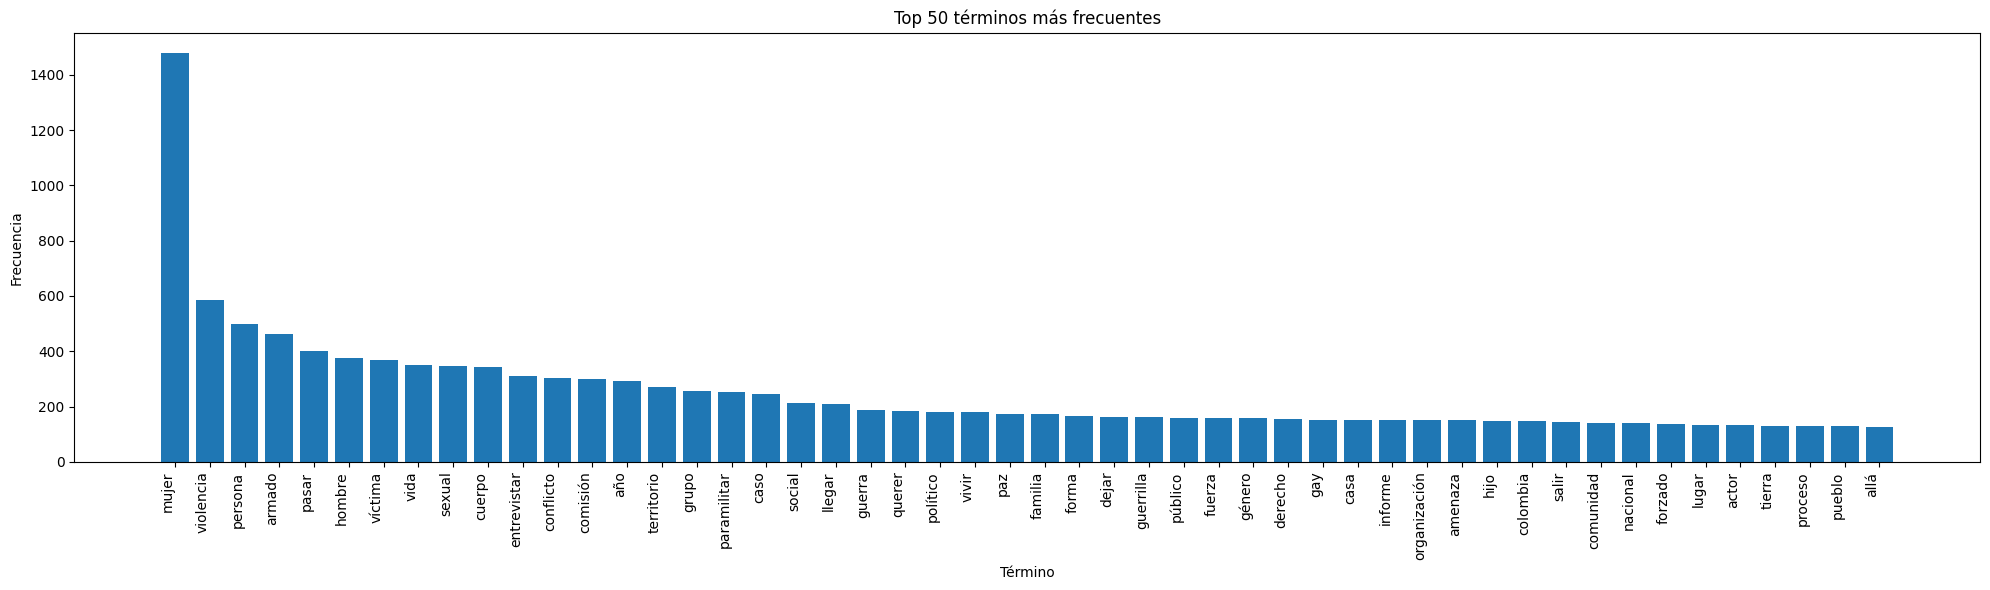

In [20]:
graficar_frecuencias(df_libro, "contenido_preprocesado", top_n=50, min_len=1)

('allá', 'llegar', 'gente', 'pasar', 'año', 'cosa', 'querer', 'venir', 'conocido', 'persona', 'salir', 'pa', 'creer', 'organización', 'hablar', 'acá', 'quedar', 'momento', 'llamar', 'matar', 'vivir', 'empezar', 'casa', 'trabajar', 'tiempo', 'social', 'grupo', 'guerrilla', 'test', 'tema', 'hijo', 'familia', 'dejar', 'tocar', 'lugar', 'volver', 'proceso', 'farc', 'vida', 'seguir', 'señor', 'comunidad', 'ejemplo', 'familiar', 'paramilitar', 'mamá', 'mujer', 'ejército', 'contar', 'pueblo')
(96669, 95980, 86713, 80506, 74069, 72037, 65240, 64741, 64312, 54320, 53109, 52405, 50192, 48730, 48727, 48596, 46740, 44981, 44771, 44412, 44086, 43746, 40103, 38033, 36763, 36430, 35875, 35138, 33320, 32991, 32477, 32393, 31451, 31347, 31299, 29283, 28343, 28252, 27967, 27610, 27291, 27231, 27022, 26929, 26844, 26106, 25372, 25001, 24515, 24351)


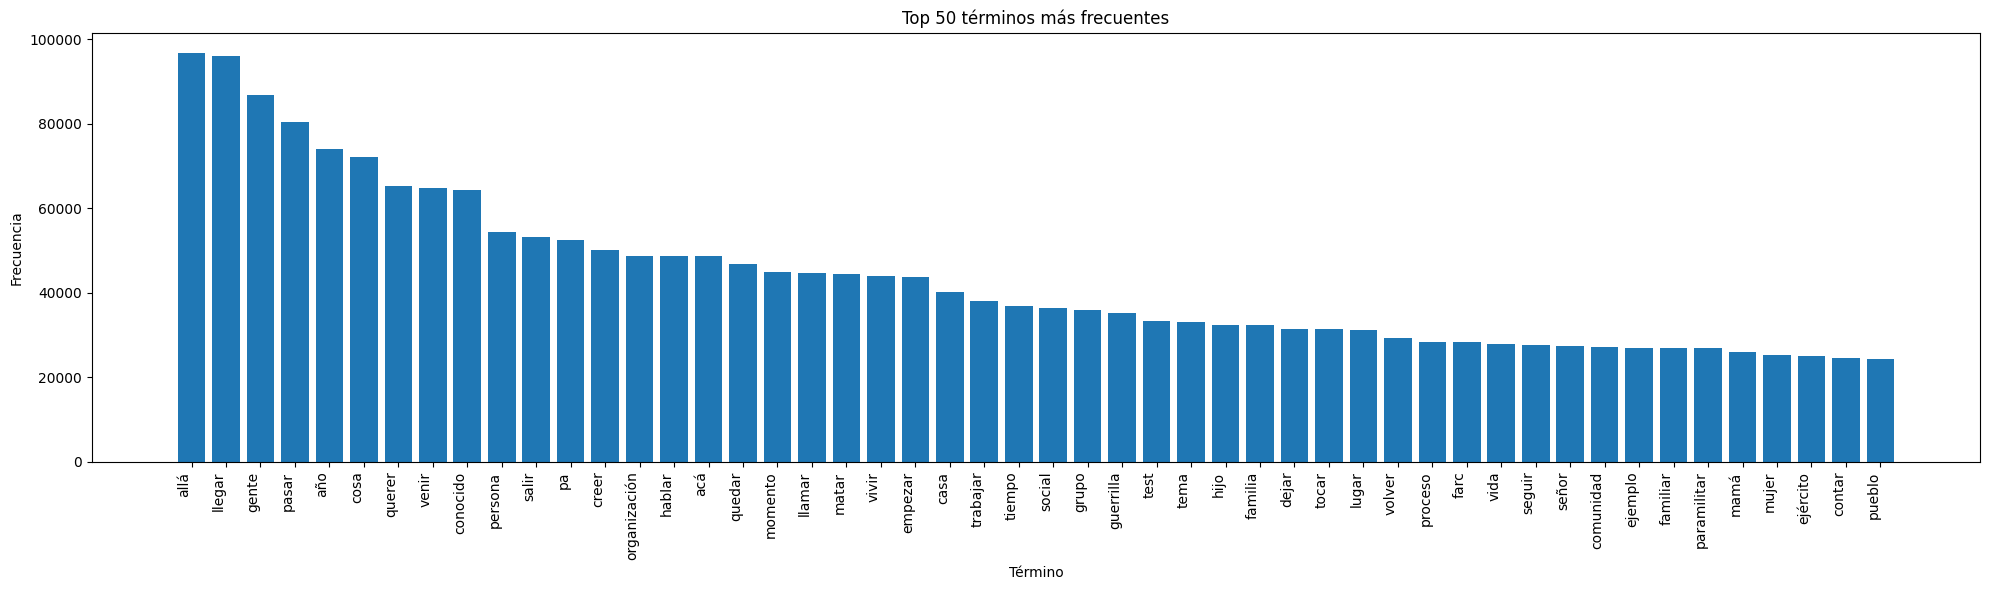

In [21]:
graficar_frecuencias(df_testimonios, "contenido_preprocesado", top_n=50, min_len=1)

----
## Nube de palabras

In [25]:
frecuencias_w = dict(frecuencias)

In [30]:
nube = WordCloud(width=800,height=400,background_color='white',colormap='viridis').generate_from_frequencies(frecuencias_w)

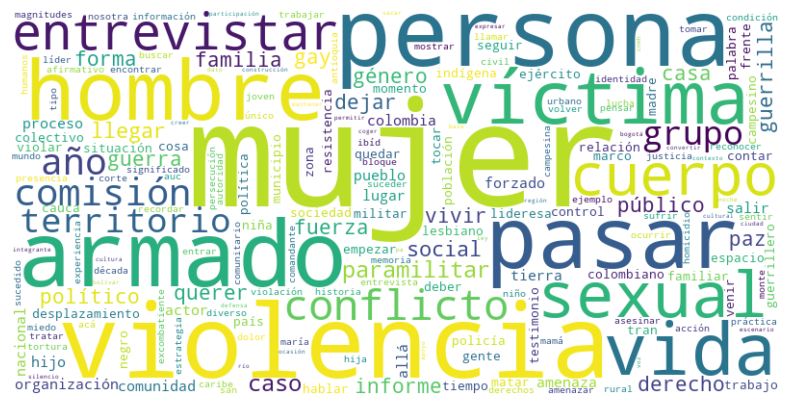

In [32]:
# Mostrar la nube
plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
def nube_palabras(df: pd.DataFrame, col: str, min_len: int = 1, titulo="Nube de Palabras") -> Image.Image:
    """
    Genera una nube de palabras tal cual el texto recibido, sin filtrado ni stopwords.
    Retorna un objeto PIL.Image.
    """
    frecuencias = frecuencia_terminos_columna_str(df, col, min_len)

    if not frecuencias:
        print("No hay datos para graficar.")
        return
    
    frecuencias_dict = dict(frecuencias)
    
    # Crear la nube de palabras
    nube = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',   # puedes cambiar el esquema de colores
        max_words=200
    ).generate_from_frequencies(frecuencias_dict)

    plt.figure(figsize=(15, 7))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

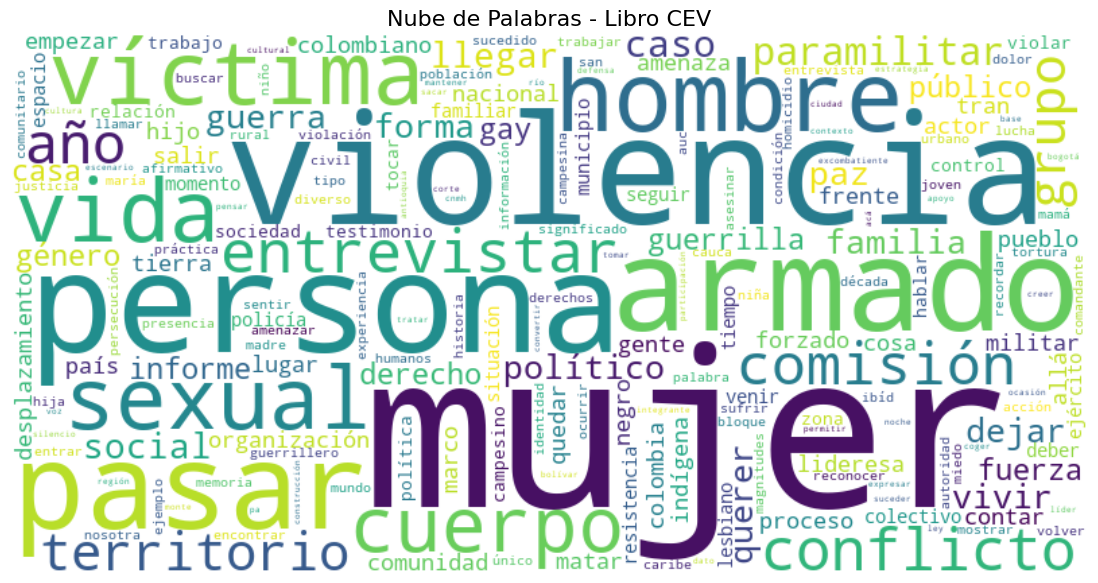

In [47]:
nube_palabras(df_libro, "contenido_preprocesado", min_len=1, titulo="Nube de Palabras - Libro CEV")

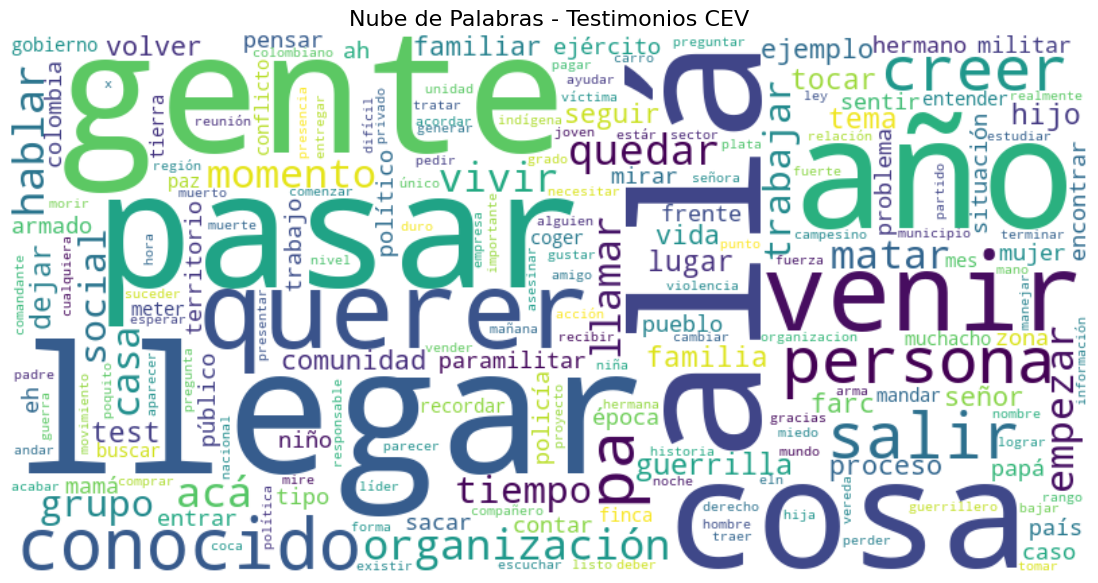

In [48]:
nube_palabras(df_testimonios, "contenido_preprocesado", min_len=1, titulo="Nube de Palabras - Testimonios CEV")

---
## Diversidad Lexica

In [51]:
total_tokens = len(tokens_doc)
tipos_unicos = len(set(tokens_doc))

In [54]:
# Evitar división por cero
if total_tokens == 0:
    ttr = 0.0
    rttr = 0.0
else:
    ttr  = tipos_unicos / total_tokens
    rttr = tipos_unicos / sqrt(total_tokens)

In [56]:
 # Informe por print (simple y claro)
print("=== Informe de Diversidad Léxica (Corpus) ===")
print(f"Tokens totales:       {total_tokens}")
print(f"Tipos únicos:         {tipos_unicos}")
print(f"TTR (Type-Token Ratio): {ttr:.4f}")
print(f"RTTR (Root TTR):        {rttr:.4f}")

=== Informe de Diversidad Léxica (Corpus) ===
Tokens totales:       57846
Tipos únicos:         8615
TTR (Type-Token Ratio): 0.1489
RTTR (Root TTR):        35.8194


In [58]:
def aplanar_tokens(df: pd.DataFrame, col: str, min_len: int = 1):
    """
    Devuelve una lista de (término, frecuencia) a partir de una columna
    que contiene strings con formato de lista de listas.
    """
    tokens_doc = []
    for fila in df[col]:
        try:
            listas = ast.literal_eval(fila)
            for sub in listas:
                for tok in sub:
                    if len(tok) >= min_len:
                        tokens_doc.append(tok)
        except (ValueError, SyntaxError):
            continue
    return tokens_doc


In [59]:
def diversidad_lexica(df: pd.DataFrame, col: str , min_len: int = 1) -> None:
    """
    Calcula e imprime las métricas de diversidad léxica (TTR y RTTR)
    para la columna indicada del DataFrame.
    """

    # Aplanar los tokens
    tokens_doc = aplanar_tokens(df, col, min_len)

    # Calcular métricas
    total_tokens = len(tokens_doc)
    tipos_unicos = len(set(tokens_doc))

    # Evitar división por cero
    if total_tokens == 0:
        ttr = 0.0
        rttr = 0.0
    else:
        ttr  = tipos_unicos / total_tokens
        rttr = tipos_unicos / sqrt(total_tokens)
    
     # Informe por print
    print("=== Informe de Diversidad Léxica (Corpus) ===")
    print(f"Tokens totales:       {total_tokens}")
    print(f"Tipos únicos:         {tipos_unicos}")
    print(f"TTR (Type-Token Ratio): {ttr:.4f}")
    print(f"RTTR (Root TTR):        {rttr:.4f}")
        

In [60]:
diversidad_lexica(df_libro,"contenido_preprocesado" , 1)

=== Informe de Diversidad Léxica (Corpus) ===
Tokens totales:       57846
Tipos únicos:         8615
TTR (Type-Token Ratio): 0.1489
RTTR (Root TTR):        35.8194


In [61]:
diversidad_lexica(df_testimonios,"contenido_preprocesado" , 1)

=== Informe de Diversidad Léxica (Corpus) ===
Tokens totales:       9464382
Tipos únicos:         116107
TTR (Type-Token Ratio): 0.0123
RTTR (Root TTR):        37.7409
